<center>
<h1 style="color: #007BC4;">Python</h1> 
<h3 style="color: #333333;">Gráficas - Matplotlib: boxplots</h3> 
</center>
<br>

In [2]:
import matplotlib.pyplot as plt
import numpy as np


# Boxplot

Un `boxplot` es una forma de representar estadísticamente la _distribución_ de los datos mediante cinco dimensiones principales:

-   **Mínimo:** el menor valor dentro del conjunto de datos que está dentro del rango de 1.5 veces el IQR por debajo de Q1. Si hay valores menores a este rango, se consideran outliers y se representan como puntos separados.
-   **Primer Cuartil:(Q1)** El 25% de los valores son menores o igual a este valor.
-   **Segundo Cuartil (Mediana)(Q2):** Divide en 2 partes iguales la distribución. El 50% son menores o iguales a este valor.
-   **Tercer Cuartil:(Q3)** el 75% de los valores son menores o iguales a este valor.
-   **Máximo:** mayor valor dentro del conjunto de datos que está dentro del rango de 1.5 veces el IQR por encima de Q3. Si hay valores mayores a este rango, también se consideran outliers y se representan como puntos separados.
-   **Rango intercuantílico (RIC, IQR):** Diferencia entre el valor del tercer cuartil y el primer cuartil.

Nos da una visión de la simetría de la distribución de los datos, si la mediana no está en el centro, la distribución no es simétrica.

Sirve para ver si existen valores atípicos(outliers). Permite ver cómo es la dispersión de los puntos con la mediana, los cuartiles(percentiles) 25 y 75 y los valores máximo y mínimo. 

- **Caja:** Representa el rango intercuartílico (IQR), que va desde el primer cuartil (Q1) hasta el tercer cuartil (Q3). Dentro de la caja se marca la mediana (Q2).
- **Bigotes (whiskers):** Las líneas que se extienden desde los extremos de la caja hasta los valores máximos y mínimos dentro de un límite determinado. Los bigotes no se extienden hasta los valores que se consideran outliers (valores atípicos).
- **Tapas (caps):** marcan visualmente el límite superior e inferior de los bigotes, por lo que indican el valor máximo y valor mínimo de los datos dentro de los límites no considerados atípicos
- **Outliers(fliers):** Son los valores que caen fuera del rango de los bigotes. Los outliers se muestran típicamente como puntos individuales fuera de los bigotes. Son valores más bajos que **Q1-1.5 * IQR** y valores mayores que **Q3+1,5 * IQR**

<img src="img/boxplot.png" width="400">


## Ejemplo de boxplot

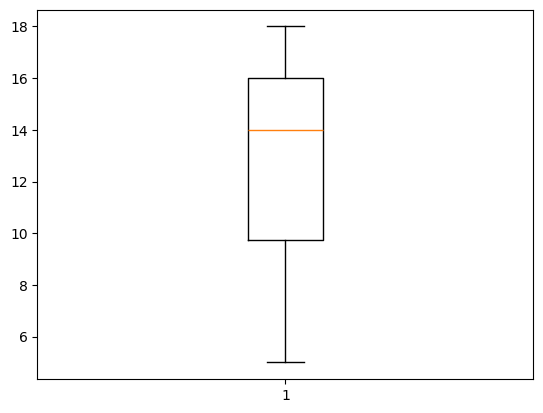

In [15]:
x = np.random.randint(low=0, high=20, size=20)
x.sort()

plt.boxplot(x)
plt.show()

#### Añadimos un valor alto para ver el efecto
El bigote superior se alarga para incluir el nuevo dato. La caja y la mediana debería cambiar ligeramente

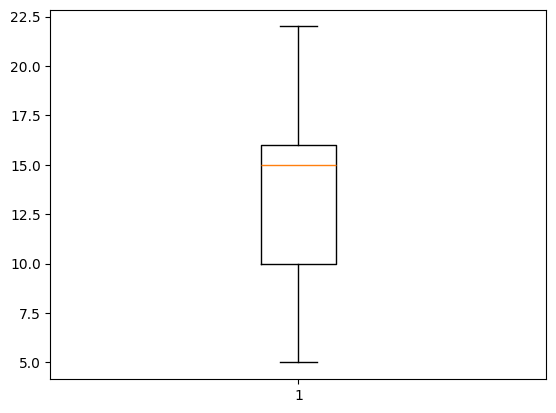

In [16]:
x = np.append(x, 22)
plt.boxplot(x) 
plt.show()

#### Añadimos valores mucho más altos para ver el efecto

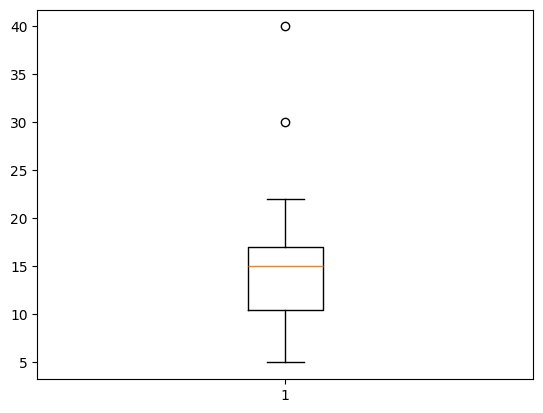

In [17]:
x = np.append(x, 30)
x = np.append(x, 40)

plt.boxplot(x) 

plt.show()

### Se puede cambiar la orientación

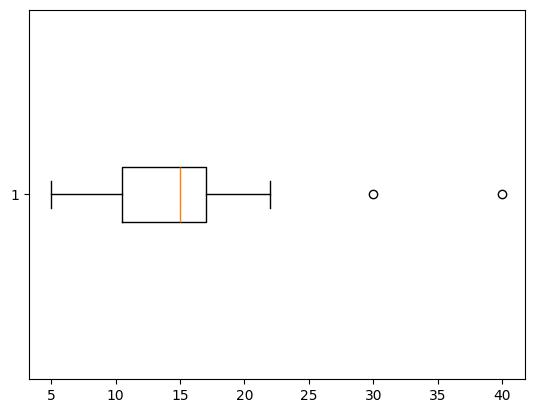

In [18]:
plt.boxplot(x, vert=False) 
plt.show()

### Se puede añadir una muesca para destacar la mediana

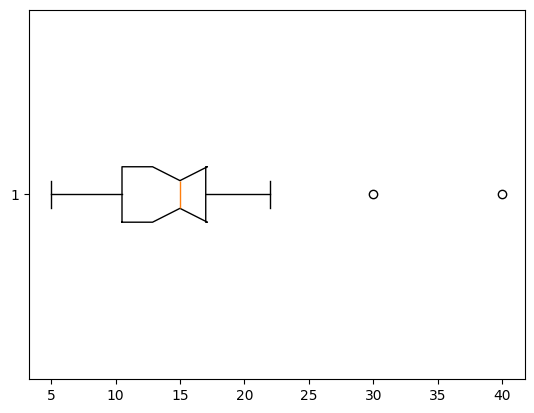

In [20]:
plt.boxplot(x, 
            vert=False,
            notch=True) 

plt.show()

### Formateando el boxplot

Por defecto es un objeto Line2D y las opciones de formateo son limitadas pero se puede convertir a un objeto PathPatch fijando el parámetro <code>patch_artist=True</code>.


<a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.PathPatch.html?highlight=pathpatch#matplotlib.patches.PathPatch">Más información sobre objetos PathPatch</a>

{'whiskers': [<matplotlib.lines.Line2D at 0x170d8a09d10>,
 'caps': [<matplotlib.lines.Line2D at 0x170d8a09f90>,
 'boxes': [<matplotlib.lines.Line2D at 0x170d8a09bd0>],
 'medians': [<matplotlib.lines.Line2D at 0x170d8a0a210>],
 'fliers': [<matplotlib.lines.Line2D at 0x170d8a0a350>],
 'means': []}

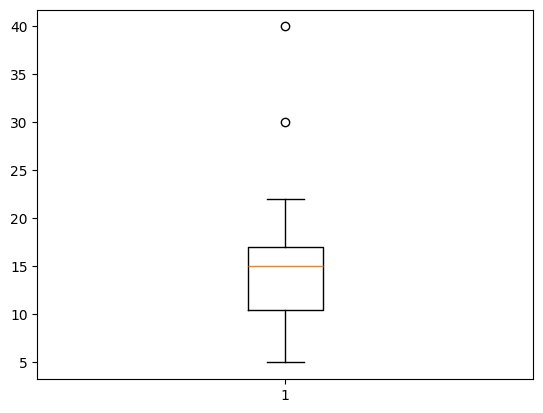

In [21]:
bp = plt.boxplot(x)
bp

{'whiskers': [<matplotlib.lines.Line2D at 0x170d6916ad0>,
 'caps': [<matplotlib.lines.Line2D at 0x170d6916d50>,
 'boxes': [<matplotlib.patches.PathPatch at 0x170d6916850>],
 'medians': [<matplotlib.lines.Line2D at 0x170d6916fd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x170d6917110>],
 'means': []}

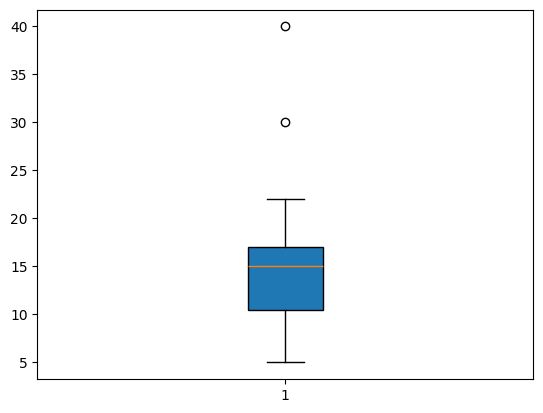

In [23]:
bp = plt.boxplot(x, patch_artist=True) 
bp

#### Ver el número de elementos del boxplot

In [24]:
print('Number of boxes: ', len(bp['boxes']))
print('Number of whiskers: ', len(bp['whiskers']))  #los bigotes
print('Number of caps: ', len(bp['caps'])) #las gorras/tapas de los bigotes
print('Number of medians: ', len(bp['medians'])) 
print('Number of fliers: ', len(bp['fliers'])) #los outliers

Number of boxes:  1
Number of whiskers:  2
Number of caps:  2
Number of medians:  1
Number of fliers:  1


#### Cambiar el color de la caja

[None, None, None]

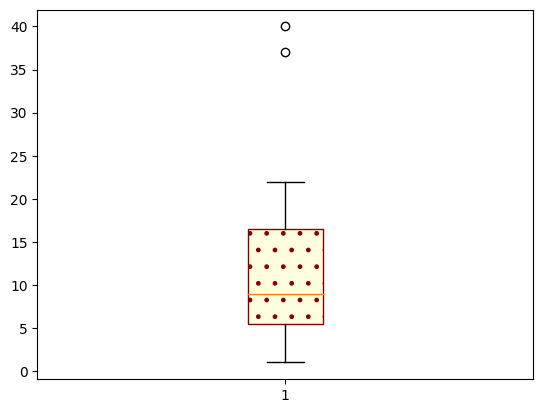

In [10]:
bp = plt.boxplot(x, patch_artist=True) 

bp['boxes'][0].set(facecolor='lightyellow', 
                   edgecolor='maroon', 
                   hatch='.')

#### Configurar los "whiskers"
Whisker 0 es el inferior, 1 el superior

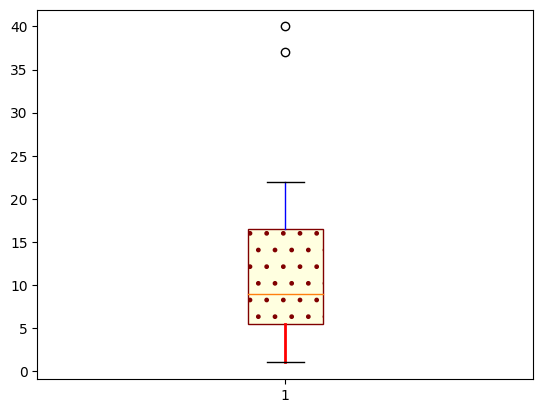

In [11]:
bp = plt.boxplot(x, patch_artist=True) 

bp['boxes'][0].set(facecolor='lightyellow', 
                   edgecolor='maroon', 
                   hatch='.')

bp['whiskers'][0].set(color='red', 
                      linewidth=2)

bp['whiskers'][1].set(color='blue')

plt.show()

#### Configurar las "caps"
Cap 0 está al final del whisker 0 y cap 1 al final del whisker 1

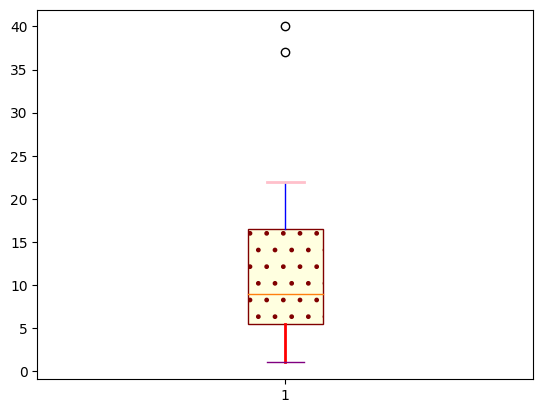

In [12]:
bp = plt.boxplot(x, patch_artist=True) 

bp['boxes'][0].set(facecolor='lightyellow', 
                   edgecolor='maroon', 
                   hatch='.')

bp['whiskers'][0].set(color='red', 
                      linewidth=2)

bp['whiskers'][1].set(color='blue')

bp['caps'][0].set(color='purple')

bp['caps'][1].set(color='pink',
                  linewidth=2)

plt.show()

#### Configurar los "outlier"
Outliers se llaman "fliers" en los boxplots y también se pueden formatear

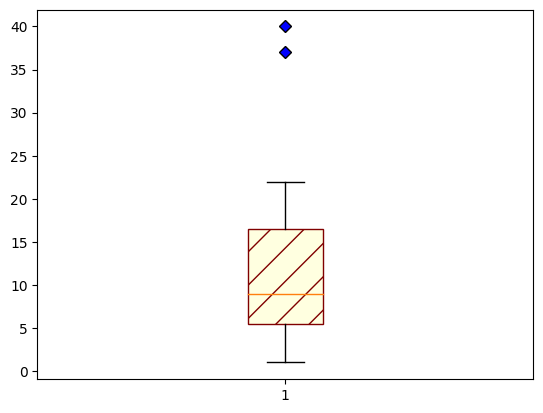

In [13]:
bp = plt.boxplot(x, patch_artist=True) 

bp['boxes'][0].set(facecolor='lightyellow', 
                   edgecolor='maroon', 
                   hatch='/')

bp['fliers'][0].set(marker='D', 
                    markerfacecolor='blue')

plt.show()

#### Configurar la línea de la mediana

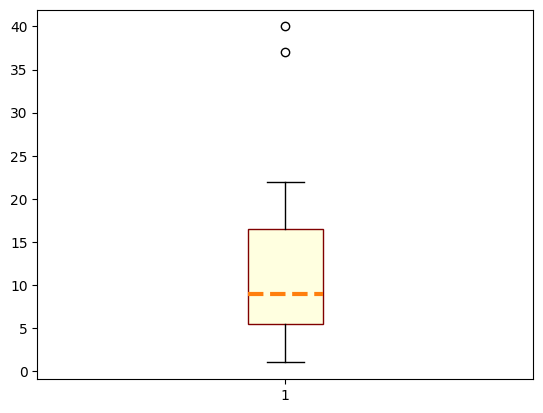

In [14]:
bp = plt.boxplot(x, patch_artist=True) 

bp['boxes'][0].set(facecolor='lightyellow', 
                   edgecolor='maroon')

bp['medians'][0].set(linestyle='--', 
                     linewidth=3)

plt.show()

### Uso con un conjunto de datos


#### Cargamos el conjunto de datos con pandas:

In [26]:
import pandas as pd
exam_data = pd.read_csv('data/exams.csv')
exam_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group C,some high school,free/reduced,none,69,61,58
1,female,group C,some college,free/reduced,completed,47,65,69
2,male,group A,high school,standard,none,66,52,53
3,male,group B,some college,standard,none,88,89,82
4,female,group C,master's degree,free/reduced,none,62,82,76


#### Extraemos las notas de los exámenes

In [31]:
exam_scores = exam_data[['math score', 'reading score', 'writing score']]
exam_scores.head()

,math score,reading score,writing score
0,69,61,58
1,47,65,69
2,66,52,53
3,88,89,82
4,62,82,76


Lo convertimos a un array numpy para usarlo en la gráfica. 

In [32]:
#exam_scores_array = np.array(exam_scores)
exam_scores_array = exam_scores.to_numpy()  
exam_scores_array

array([[ 69,  61,  58],
       [ 47,  65,  69],
       [ 66,  52,  53],
       [ 88,  89,  82],
       [ 62,  82,  76],
       [ 47,  69,  60],
       [ 71,  66,  74],
       [ 57,  62,  60],
       [ 60,  67,  65],
       [ 74,  72,  76],
       [ 77,  71,  67],
       [ 69,  79,  83],
       [ 65,  62,  56],
       [ 55,  58,  51],
       [ 78,  88,  91],
       [ 70,  72,  72],
       [ 55,  69,  55],
       [ 68,  68,  62],
       [ 73,  62,  58],
       [ 54,  50,  51],
       [ 81,  76,  77],
       [ 70,  76,  73],
       [ 64,  62,  63],
       [ 51,  66,  63],
       [ 49,  50,  43],
       [ 83,  80,  82],
       [ 86,  92,  81],
       [ 83,  89,  94],
       [ 61,  77,  68],
       [ 55,  50,  44],
       [ 56,  59,  55],
       [ 46,  57,  61],
       [ 68,  60,  52],
       [ 78,  75,  69],
       [ 85,  94,  93],
       [ 95,  99,  95],
       [ 82,  74,  78],
       [ 94,  85,  96],
       [ 64,  71,  68],
       [ 70,  80,  85],
       [ 84,  78,  84],
       [ 62,  81

#### Dibujamos un boxplot para representar la notas

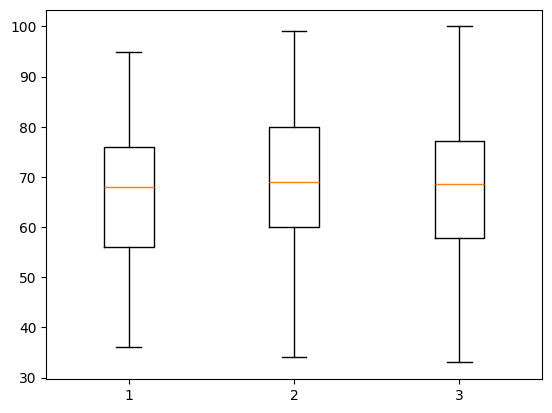

In [33]:
bp = plt.boxplot(exam_scores_array)

plt.show()

#### Componentes del boxplot

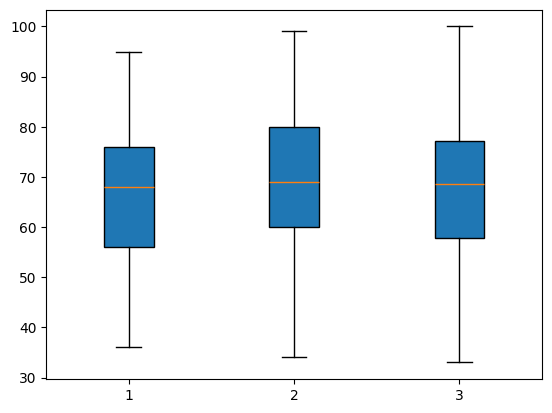

In [34]:
bp = plt.boxplot(exam_scores_array, 
                 patch_artist=True)

In [35]:
print('Number of boxes: ', len(bp['boxes']))
print('Number of whiskers: ', len(bp['whiskers']))
print('Number of caps: ', len(bp['caps']))
print('Number of medians: ', len(bp['medians']))
print('Number of fliers: ', len(bp['fliers']))

Number of boxes:  3
Number of whiskers:  6
Number of caps:  6
Number of medians:  3
Number of fliers:  3


### Formateando el boxplot

#### The colors to use for the boxes

In [36]:
colors = ['blue', 'grey', 'lawngreen']

#### Dando formato a las cajas y los "caps" superiores

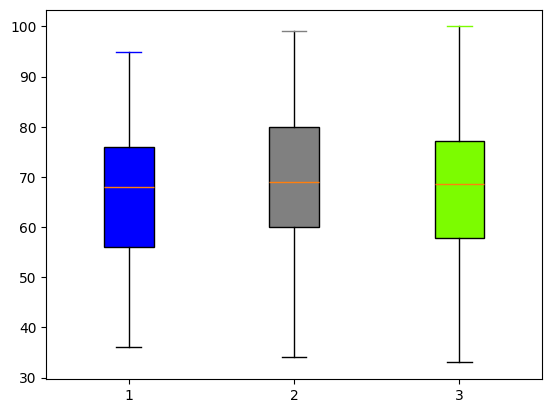

In [37]:
bp = plt.boxplot(exam_scores_array, 
                 patch_artist=True)

for i in range(len(bp['boxes'])):
    
    bp['boxes'][i].set(facecolor=colors[i])
    
    bp['caps'][2*i + 1].set(color=colors[i])

#### Fijando una etiqueta para los xticks (marca en el eje horizontal)

([<matplotlib.axis.XTick at 0x170dc776e90>,
 [Text(1, 0, 'Math'), Text(2, 0, 'Reading'), Text(3, 0, 'Writing')])

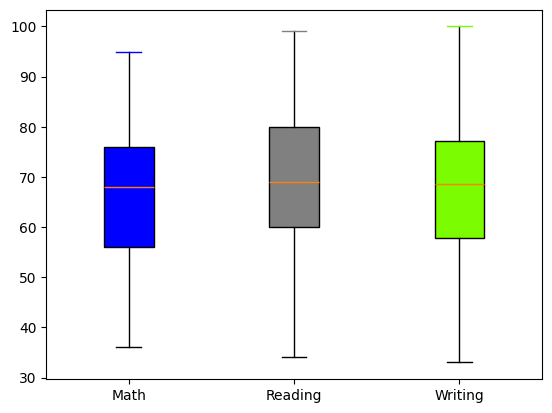

In [38]:
bp = plt.boxplot(exam_scores_array, 
                 patch_artist=True)

for i in range(len(bp['boxes'])):
    
    bp['boxes'][i].set(facecolor=colors[i])
    
    bp['caps'][2*i + 1].set(color=colors[i])
    
plt.xticks([1, 2, 3], ['Math', 'Reading', 'Writing'])